# Introduction

This dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores (out of 340) 2. TOEFL Scores (out of 120) 3. University Rating (out of 5) 4. Statement of Purpose and Letter of Recommendation Strength (out of 5) 5. Undergraduate GPA (out of 10) 6. Research Experience (either 0 or 1) 7. Chance of Admit (ranging from 0 to 1)

The dataset was originally created by Mohan S Acharya and obtained from Kaggle.

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

Citation
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

## [=> view interactive plots here <=](https://nbviewer.jupyter.org/github/kylelee417/CollabProject/blob/master/project_notebook.ipynb)

## Import data and modules for EDA

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly import tools
%matplotlib inline

In [2]:
init_notebook_mode(connected=True)

In [3]:
path = os.path.join("Data","Admission_Predict.csv")
ga_df = pd.read_csv(path)
print("Data is imported!")

Data is imported!


## Data analysis and cleaning

In [4]:
ga_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
ga_df.info()
print('\n'+'Dataframe shape is: {}'.format(ga_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB

Dataframe shape is: (500, 9)


### Checking missing values

In [6]:
ga_df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

### Serial number has no information

In [7]:
ga_df.drop('Serial No.',axis=1,inplace=True)

### White space exists at the end of some column names --> stripping

In [8]:
ga_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
ga_df.columns = list(map(lambda col: col.strip(),ga_df.columns))

## Data transformation
### Set the threshold on "Chance of Admit" to create a new binary category

In [10]:
threshold = 0.7 #arbitrary
ga_df['likeness'] = ga_df['Chance of Admit'].apply(lambda chance: 'likely' if chance>threshold else 'not_likely')

## EDA

In [11]:
ga_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,likeness
0,337,118,4,4.5,4.5,9.65,1,0.92,likely
1,324,107,4,4.0,4.5,8.87,1,0.76,likely
2,316,104,3,3.0,3.5,8.00,1,0.72,likely
3,322,110,3,3.5,2.5,8.67,1,0.80,likely
4,314,103,2,2.0,3.0,8.21,0,0.65,not_likely


Text(0, 0.5, 'Number of students')

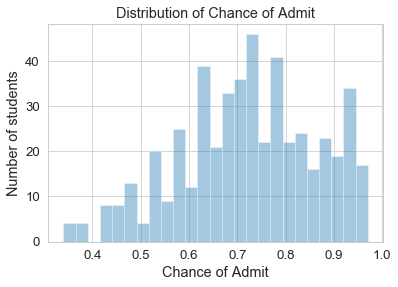

In [12]:
sns.distplot(ga_df['Chance of Admit'],bins=25,kde=False)
plt.title('Distribution of Chance of Admit')
plt.ylabel('Number of students')

### Chance of admission over three continuous variables; `GRE Score`, `TOEFL Score` and `CGPA`.
As expected, all three variables are strongly correlated with the chance of admission. Interestingly, there is not many outliers in the trend shown below. "Strong" students are well-rounded, holding high scores in `GRE Score`, `TOEFL Score` and `CGPA`. The similar trend was observed in other groups of students as well.

In [13]:
surface1 = go.Scatter3d(x=ga_df['GRE Score'],y=ga_df['TOEFL Score'],z=ga_df['CGPA'],mode='markers',
                       marker=dict(size=8,color=ga_df['Chance of Admit'],colorscale='Viridis',
                                   opacity=0.8,colorbar=dict(thickness=20,title='Chance of admission')))
data = [surface1]
layout = go.Layout(scene=dict(xaxis=dict(title='GRE Score'),
                              yaxis=dict(title='TOEFL Score'),
                              zaxis=dict(title='CGPA')))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Continuous variables by `University Rating`
The chance of admissino, however, needs to be interpreted based on the `University Rating`. Students with the same academic profiles will definitely have difference chance of admission to different universities.

Students with high academic scores tend to apply to universities with *Rating 5*. On the other hand, universities with *Rating 1* is popular among students with low academic scores.

In [14]:
color_names = ['','1','2','3','4','5']
color_vals = list(range(len(color_names)))
num_colors = len(color_vals)
colorscale = [
[0, 'rgb(255,0,0)'], #1
[1/5, 'rgb(255,0,0)'],
[1/5, 'rgb(0,25,51)'], #2
[2/5, 'rgb(0,25,51)'],
[2/5, 'rgb(0,204,204)'], #3
[3/5, 'rgb(0,204,204)'],
[3/5, 'rgb(255,247,0)'], #4
[4/5, 'rgb(255,247,0)'],
[4/5, 'rgb(255,145,0)'], #5
[5/5, 'rgb(255,145,0)']]
cmin = 0.5
cmax = num_colors-0.5

trace0=go.Scatter(x=ga_df['GRE Score'],y=ga_df['TOEFL Score'],mode='markers',
                  marker=dict(size=10,color=ga_df['University Rating'],colorscale=colorscale,
                              cmin=cmin,cmax=cmax,opacity=0.7))
trace1=go.Scatter(x=ga_df['CGPA'],y=ga_df['Chance of Admit'],mode='markers',
                 marker=dict(size=10,color=ga_df['University Rating'],colorscale=colorscale,
                             cmin=cmin,cmax=cmax,opacity=0.7,
                             colorbar=dict(
                                 title='University Rating',
                                 tickvals= color_vals,
                                 ticktext= color_names,
                                 thickness=20)))
fig=tools.make_subplots(1,2,subplot_titles=('',''))
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)

fig['layout']['xaxis1'].update(title='GRE Score')
fig['layout']['yaxis1'].update(title='TOEFL Score')
fig['layout']['xaxis2'].update(title='CGPA')
fig['layout']['yaxis2'].update(title='Chance of Admit')
fig.layout.update(title='Variables by University Rating',showlegend=False)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Detailed distribution of each score can be outlined with the box plots. These show that the mean academic scores can be used to predict an university that students with certain academic profiles are likely to apply to.

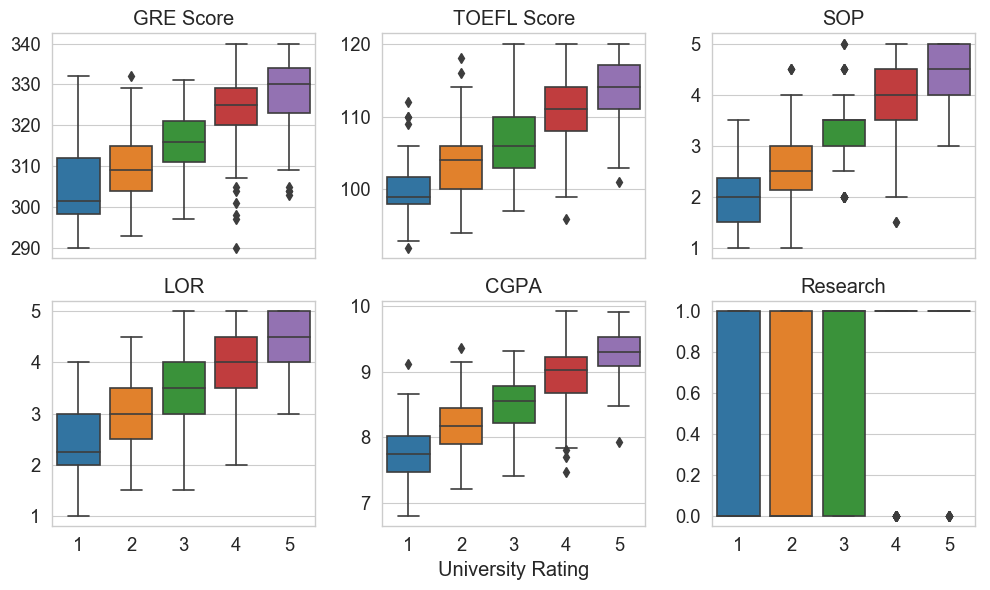

In [15]:
cols = ['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research']

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(10,6),dpi=100,sharex=True)
for ax,col in zip(axes.flatten(),cols):
    sns.boxplot(x='University Rating',y=col,data=ga_df,ax=ax)
    ax.set_xlabel('') 
    ax.set_ylabel('')
    ax.set_title(col)
    if ax == (axes.flatten()[4]):
        ax.set_xlabel('University Rating')
plt.tight_layout()

In this project, it was arbitrarily determined that students with the chance of admit greather than 70% are categorized as *likely to be admitted*.

Interestingly, regardless of the type of the university rating, students who are likely to be admitted have similar `GRE Score`, `TOEFL Score` and `CGPA`.

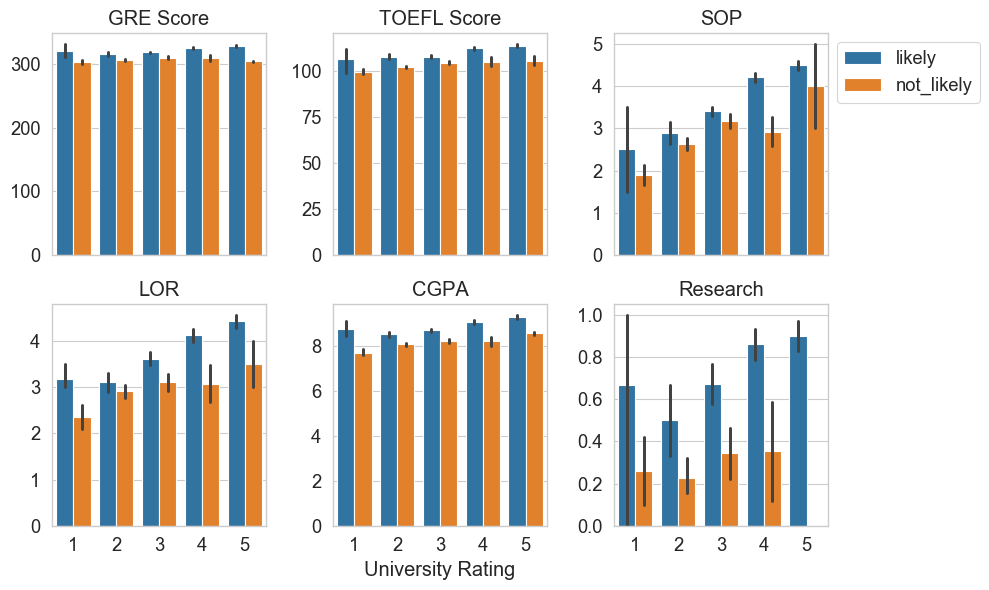

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(10,6),dpi=100,sharex=True)
cols = ['GRE Score','TOEFL Score','SOP','LOR','CGPA','Research']
for ax,col in zip(axes.flatten(),cols):
    sns.barplot(x='University Rating',y=col,data=ga_df,hue='likeness',ax=ax)
    ax.set_title(col)
    ax.set_xlabel('') 
    ax.set_ylabel('')
    ax.legend(frameon=True,bbox_to_anchor=(1.0,1),loc="upper left")
    if ax == (axes.flatten()[4]):
        ax.set_xlabel('University Rating')
    if ax != axes.flatten()[2]:
        ax.get_legend().set_visible(False)
fig.tight_layout()

Correlations among different features can be analyzed further, treating `Chance of Admit` as continuous variable.

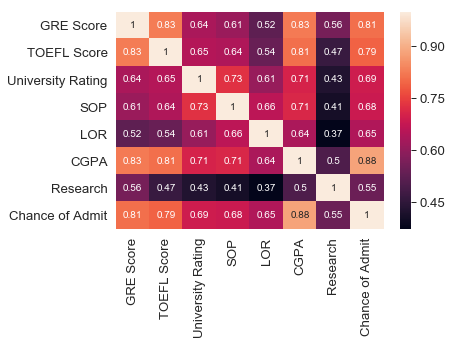

In [17]:
sns.heatmap(ga_df.corr(),annot=True)

Correlations among different features can be analyzed further, treating `Chance of Admit` as discrete variable.

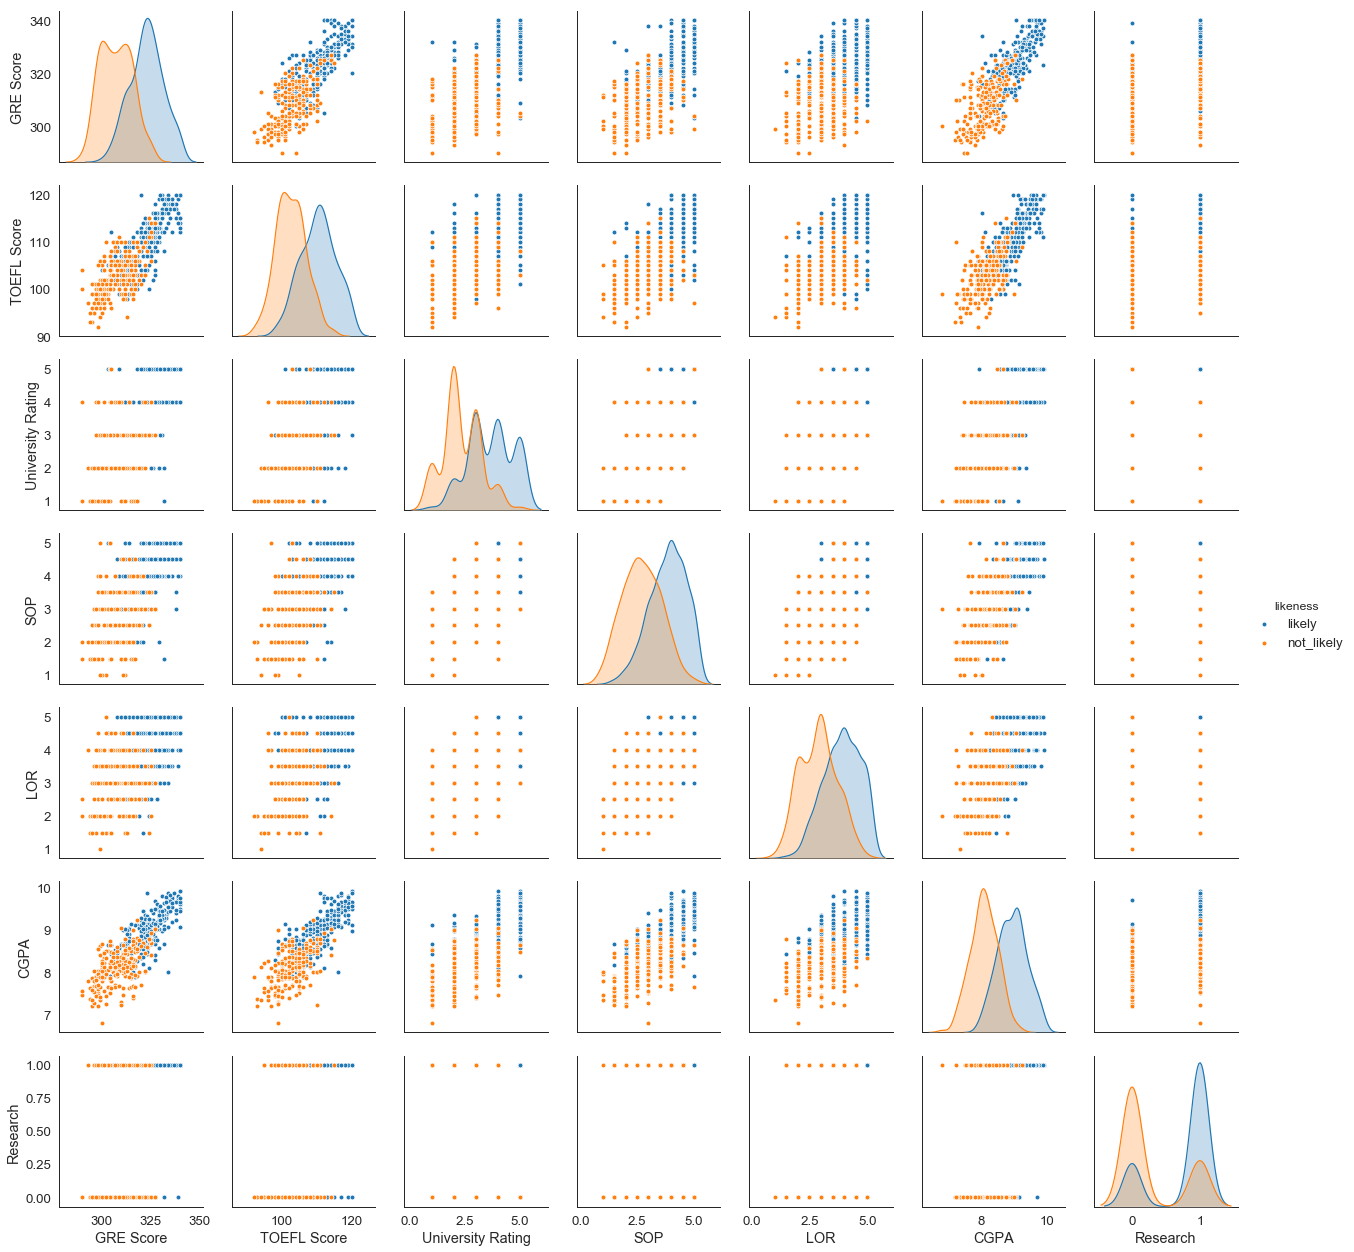

In [18]:
sns.set_style('white')
sns.pairplot(ga_df,vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],hue='likeness')

## PCA representation

In [19]:
from sklearn.preprocessing import StandardScaler
x = ga_df[list(ga_df.columns)[:-2]].values
x = StandardScaler().fit_transform(x)
y = ga_df['likeness'].values

### Eigendecomposition - Computing Eigenvectors and Eigenvalues 
#### Covariance Matrix

In [20]:
cov_mat = np.cov(x.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00200401 0.82885812 0.63664951 0.61472713 0.52573085 0.82753302
  0.56452718]
 [0.82885812 1.00200401 0.6511014  0.64570179 0.54264859 0.81219793
  0.46794796]
 [0.63664951 0.6511014  1.00200401 0.72948254 0.60987045 0.70666768
  0.42790326]
 [0.61472713 0.64570179 0.72948254 1.00200401 0.66503693 0.71358149
  0.40893371]
 [0.52573085 0.54264859 0.60987045 0.66503693 1.00200401 0.6387467
  0.37327215]
 [0.82753302 0.81219793 0.70666768 0.71358149 0.6387467  1.00200401
  0.50231563]
 [0.56452718 0.46794796 0.42790326 0.40893371 0.37327215 0.50231563
  1.00200401]]


In [21]:
cov_mat = np.cov(x.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.40361694  0.27452263  0.36263743 -0.14482269 -0.73757122  0.25090997
   0.04779188]
 [ 0.40120339  0.11081202  0.46108277 -0.12684268  0.2632937  -0.72652707
  -0.03008301]
 [ 0.3834133  -0.2497745  -0.09291061  0.64173368 -0.02642093 -0.03207901
   0.60698049]
 [ 0.38466158 -0.3434338  -0.17312554  0.32685429 -0.12279282 -0.01981706
  -0.76276584]
 [ 0.3471675  -0.42602733 -0.46450082 -0.64859464 -0.08846344 -0.09562054
   0.21111694]
 [ 0.42103736  0.01504455  0.24073704 -0.13665843  0.59332137  0.62726591
  -0.01945709]
 [ 0.28872336  0.74182095 -0.58615408  0.07022078  0.10503789 -0.07193756
  -0.04031081]]

Eigenvalues 
[4.73582567 0.74323771 0.56275335 0.38112753 0.14824242 0.17863639
 0.264205  ]


#### Singular Vector Decomposition (SVD)

In [22]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,8)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,8)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='pc plot')

The plot above clearly shows that most of the variance (67.52% of the variance) can be explained by the first principal component alone. The second principal component still bears some information (10.60%) while the third (8.02%) and the rest principal components can be dropped with some losing information. Together, the first two principal components contain 78.12% of the information.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(pca.explained_variance_ratio_)

[0.67519343 0.10596446]


In [24]:
targetComponets = y
targetDf = pd.DataFrame(data = targetComponets, columns = ['target'])

In [25]:
finalDf = pd.concat([principalDf, targetDf[['target']]], axis = 1)

In [26]:
finalDf.head()

,principal component 1,principal component 2,target
0,-3.568375,-0.328318,likely
1,-1.639199,0.034550,likely
2,0.550991,-0.720794,likely
3,-0.345470,-1.280237,likely
4,2.035804,0.039366,not_likely


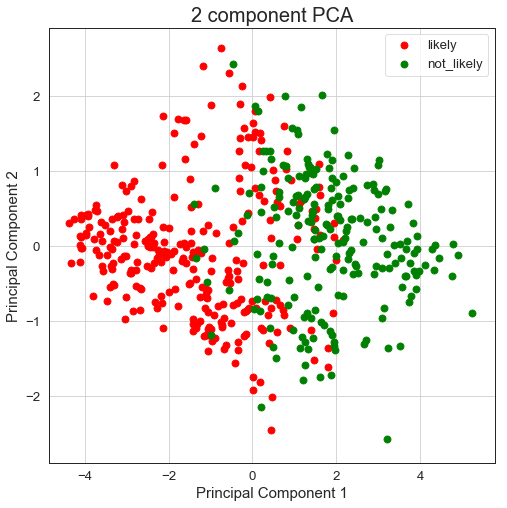

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['likely', 'not_likely']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Modelling


### Import data and modules for modelling

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# regression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, plot_importance #install by `conda install -c conda-forge xgboost`
from sklearn.metrics import mean_squared_error
# classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

### Multiple Linear Regression

In [29]:
X = ga_df.drop(['Chance of Admit','likeness'],axis=1).astype(float)
y = ga_df['Chance of Admit']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 10)

In [31]:
lm = LinearRegression().fit(X_train, y_train)

In [32]:
print('R-squared value is: {:.3f}'.format(lm.score(X_test,y_test)))
print('RMSE is: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,lm.predict(X_test)))))

R-squared value is: 0.813
RMSE is: 0.0570


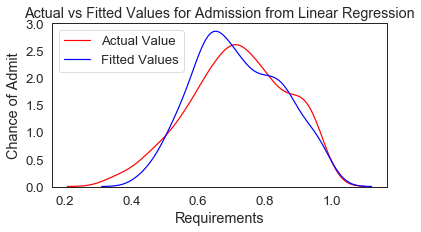

In [33]:
width = 6
height = 3
plt.figure(figsize=(width, height))
sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(lm.predict(X_train), hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Admission from Linear Regression')
plt.xlabel('Requirements')
plt.ylabel('Chance of Admit')
plt.show()
plt.close()

First model was created using multiple linear regression, using 6 features for admission. We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is still room for improvement.

### XGBoostRegressor

In [34]:
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators':[3,10,30,100,300],'max_depth':[1,3,10,30],'learning_rate':[0.05,0.1,0.3,1]}
grid_search_xgb = GridSearchCV(xgb,param_grid_xgb, cv=3).fit(X_train,y_train)

In [35]:
print('best parameters are: {}'.format(grid_search_xgb.best_params_))

best parameters are: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}


In [36]:
y_predicted = grid_search_xgb.predict(X_test)
print('R-squared value is: {:.3f}'.format(grid_search_xgb.score(X_test,y_test)))
print('RMSE is: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_predicted))))

R-squared value is: 0.787
RMSE is: 0.0608


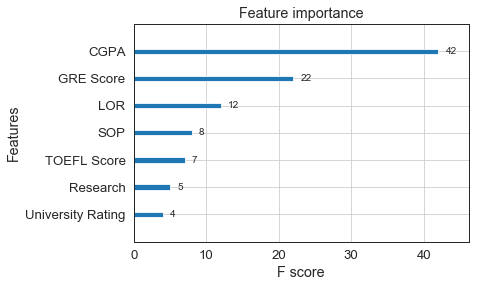

In [37]:
plot_importance(grid_search_xgb.best_estimator_)

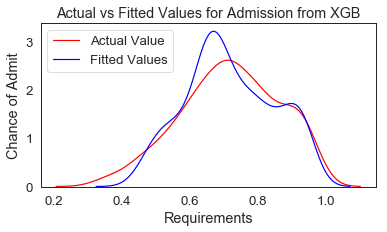

In [38]:
plt.figure(figsize=(width, height))
sns.distplot(y_train,hist=False,color="r",label="Actual Value")
sns.distplot(grid_search_xgb.predict(X_train),hist=False,color="b",label="Fitted Values")
plt.title('Actual vs Fitted Values for Admission from XGB')
plt.xlabel('Requirements')
plt.ylabel('Chance of Admit')
plt.show()
plt.close()

The second model tried was using a powerful XGBooster regressor. While same data was used, it showed a small increment in accuracy compared to the simple linear regression model.

## classification with LogisticRegression

In [39]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
X = ga_df.drop(['Chance of Admit','likeness'],axis=1).astype(float)
y = ga_df['likeness']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

In [41]:
lr = LogisticRegression()
estimators_lr = [('Standard Scaler', StandardScaler()), ('lr', LogisticRegression())]
pipe_lr = Pipeline(estimators_lr) 

In [42]:
param_grid_lr = {'lr__C':[0.01,0.03,0.1,0.3,1,3,10],'lr__solver':['liblinear','lbfgs']}
grid_search_lr = GridSearchCV(pipe_lr,param_grid_lr, cv=3).fit(X_train,y_train)

In [43]:
print('best parameters are: {}'.format(grid_search_lr.best_params_))

best parameters are: {'lr__C': 0.03, 'lr__solver': 'liblinear'}


In [44]:
print('accuracy on a test-set is: {:.3f}'.format(grid_search_lr.score(X_test,y_test)))

accuracy on a test-set is: 0.896


In [45]:
# NOTE: seems like jaccard_similiar_score will be removed in the upcoming version; we may not use it as it overlaps with the accuracy score above
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, grid_search_lr.predict(X_test))

0.896

Confusion matrix, without normalization


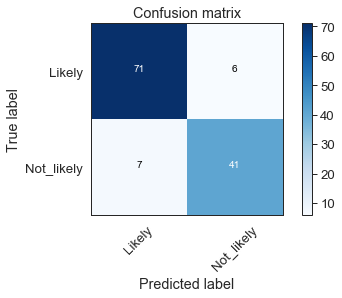

In [46]:
cnf_matrix = confusion_matrix(y_test,grid_search_lr.predict(X_test))
plot_confusion_matrix(cnf_matrix, classes=['Likely','Not_likely'])

In [47]:
print(classification_report(y_test,grid_search_lr.predict(X_test)))

              precision    recall  f1-score   support

      likely       0.91      0.92      0.92        77
  not_likely       0.87      0.85      0.86        48

   micro avg       0.90      0.90      0.90       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.90      0.90      0.90       125



## classification with SVM

In [48]:
estimators_svm = [('Standard Scaler', StandardScaler()), ('svm', SVC())]
pipe_svm = Pipeline(estimators_svm) 

In [49]:
param_grid_svm = {'svm__C':[0.003,0.01,0.05,0.1,0.3,1,3,10],'svm__kernel':['linear','rbf']}
grid_search_svm = GridSearchCV(pipe_svm,param_grid_svm,cv=3,scoring='accuracy').fit(X_train,y_train)

In [50]:
print('best parameters are: {}'.format(grid_search_svm.best_params_))

best parameters are: {'svm__kernel': 'linear', 'svm__C': 0.01}


In [51]:
print('accuracy is: {:.3f}'.format(grid_search_svm.score(X_test,y_test)))

accuracy is: 0.888


Confusion matrix, without normalization


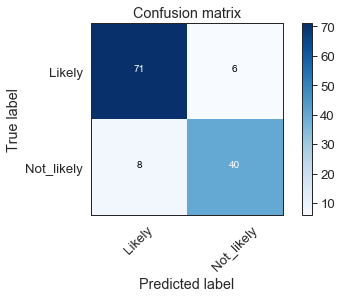

In [52]:
cnf_matrix_svm = confusion_matrix(y_test,grid_search_svm.predict(X_test))
plot_confusion_matrix(cnf_matrix_svm, classes=['Likely','Not_likely'])